# Imports

In [1]:
import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
from nltk import ISRIStemmer
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from sklearn.metrics import f1_score
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [2]:
def label_transform(label):
    if label == 'happiness':
        return 7
    elif label == 'relaxed':
        return 6
    elif label == 'surprise':
        return 5
    elif label == 'fear':
        return 4
    elif label == 'anger':
        return 3
    elif label == 'disgust':
        return 2
    elif label == 'sadness':
        return 1

In [3]:
def label_reverse(label):
    if label == 7:
        return 'happiness'
    elif label == 6:
        return 'relaxed'
    elif label == 5:
        return 'surprise'
    elif label == 4:
        return 'fear'
    elif label == 3:
        return 'anger'
    elif label == 2:
        return 'disgust'
    elif label == 1:
        return 'sadness'

In [4]:
def remove_stopwords(sentence):
    nltk.download("stopwords")
    return [word for word in sentence.split() if word not in set(nltk.corpus.stopwords.words('arabic'))]

In [5]:
def stem_text(sentence):
    stemmer = ISRIStemmer()
    return [stemmer.stem(word) for word in sentence]

In [6]:
def remove_urls(sentence):
    for word in sentence:
        if word.startswith('http'):
            sentence.remove(word)
    return sentence

In [7]:
def remove_menthash(sentence):
    for word in sentence:
        if word.startswith('@') or word.startswith('#'):
            sentence.remove(word)
    return sentence

In [8]:
def remove_punct(sentence):
    exclude = set(string.punctuation)
    return [word for word in sentence if word not in exclude]

In [9]:
def clean_tweet(sentence):
    cl1 = remove_stopwords(sentence)
    cl2 = stem_text(cl1)
    cl3 = remove_urls(cl2)
    cl4 = remove_menthash(cl3)
    cl5 = remove_punct(cl4)
    return " ".join(cl5)

# Data

In [10]:
dataset = pd.read_excel('NU_EG_Twitter_corpus_train.csv', 'NU_EG_Twitter_corpus_train.csv')
del dataset['id']
del dataset['Unnamed: 4']
del dataset['Unnamed: 6']
del dataset['Mina']
del dataset['Sherif']
dataset = dataset[pd.notnull(dataset['Hisham'])]
dataset['sentiment'] = dataset['Hisham'].apply(lambda x: label_transform(x))
dataset['tweet_clean'] = dataset['tweet'].apply(lambda x: clean_tweet(x))
dataset = dataset.dropna()
dataset

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\msonbol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading pack

,tweet,class,Hisham,sentiment,tweet_clean
0,فينو الاهبل ابن الاهبل ',neg,anger,3,ينو هبل ابن هبل
1,على المصرييييين وجمالهم ربنا يحميهم #MinaAtta...,pos,happiness,7,صري جمل ربن يحم
2,@Kholoudkewan دول كتير اوى ودمهم خفيف العمار...,pos,happiness,7,دول كتر اوى ودم خفف عمر الل انا كله سور طفل عسل
3,انا بعد كده خلى اللى يوعنى بحاجه همضى على ...,neg,surprise,5,انا كده خلى للى عنى بحج همضى وصل منه علش اضم ا...
4,انا هنتحر ',neg,sadness,1,انا هنتحر
5,في حفظ الله يا ريس http://t.co/RGKtP9QHZB ',pos,relaxed,6,حفظ الل ريس
6,يا عيون عطشان عطشانة سهر يا قلوب تعبانة تعبان...,pos,sadness,1,عين عطش عطش سهر قلب تعب تعب سفر كتر لحب تلق تل...
7,#زهقنا_من اسامي اكونتات البنات على مواقع التو...,neg,disgust,2,سمي اكن بنت وقع وصل جمع زي ثلا شرق شمس و ذهب ز...
8,@Omarr793 حمد الله ع السلامة ✋ ',pos,happiness,7,حمد الل ع سلم ✋
9,@ahmedeslam07 أحا مين ؟! ',neg,surprise,5,احا مين ؟!


# Base Value: Bag of Words

In [11]:
arabic_sw = stopwords.words("arabic")
vectorizer = CountVectorizer(analyzer = "word",  
                              tokenizer = None,  
                              preprocessor = None,  
                              stop_words = arabic_sw,  
                              max_features = 5000) 
data_features = vectorizer.fit_transform(dataset['tweet_clean'])
data_features = data_features.toarray()
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators = 500).fit( X_train, y_train )

In [12]:
y_pred_train = forest.predict(X_train)
matrix_train = confusion_matrix(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
fscore_train = f1_score(y_train, y_pred_train, average = 'weighted')
report_train = classification_report(y_train, y_pred_train)

y_pred_test = forest.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
fscore_test = f1_score(y_test, y_pred_test, average = 'weighted')
report_test = classification_report(y_test, y_pred_test)

In [16]:
print ('Train accuracy_score:', accuracy_train)
print ('\nTrain f_score:', fscore_train)
print ('\nTrain confusion_matrix:\n', matrix_train)
print ('\n', report_train)

print ('\n\nTest accuracy_score:', accuracy_test)
print ('\nTest f_score:', fscore_test)
print ('\nTest confusion_matrix:', matrix_test)
print ('\n', report_test)

Train accuracy_score: 1.0

Train f_score: 1.0

Train confusion_matrix:
 [[ 97   0   0   0   0   0   0]
 [  0  71   0   0   0   0   0]
 [  0   0  75   0   0   0   0]
 [  0   0   0  17   0   0   0]
 [  0   0   0   0  49   0   0]
 [  0   0   0   0   0 281   0]
 [  0   0   0   0   0   0 109]]

              precision    recall  f1-score   support

          1       1.00      1.00      1.00        97
          2       1.00      1.00      1.00        71
          3       1.00      1.00      1.00        75
          4       1.00      1.00      1.00        17
          5       1.00      1.00      1.00        49
          6       1.00      1.00      1.00       281
          7       1.00      1.00      1.00       109

avg / total       1.00      1.00      1.00       699



Test accuracy_score: 0.39666666666666667

Test f_score: 0.2866651253327903

Test confusion_matrix: [[  0   1   0   0   0  43   2]
 [  3   1   0   0   0  19   1]
 [  1   3   4   0   1  31   3]
 [  0   0   0   1   0   9   0]
 [ 

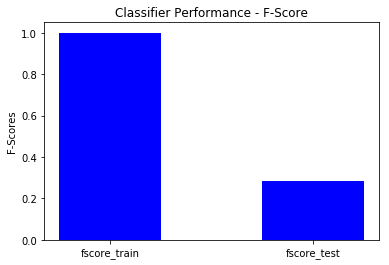

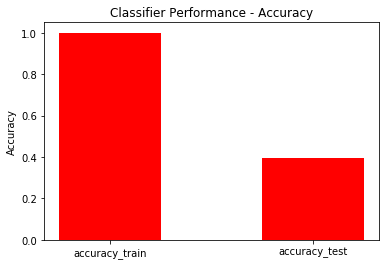

In [17]:
objects = ('fscore_train','fscore_test')
y_pos = np.arange(len(objects))
fscore_valuez = [fscore_train, fscore_test]

plt.bar(y_pos, fscore_valuez, width = 0.5, color = 'b', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('F-Scores')
plt.title('Classifier Performance - F-Score')

plt.show()

objects = ('accuracy_train','accuracy_test')
y_pos = np.arange(len(objects))
accuracy_valuez = [accuracy_train, accuracy_test]

plt.bar(y_pos, accuracy_valuez, width = 0.5, color = 'r', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Classifier Performance - Accuracy')

plt.show()

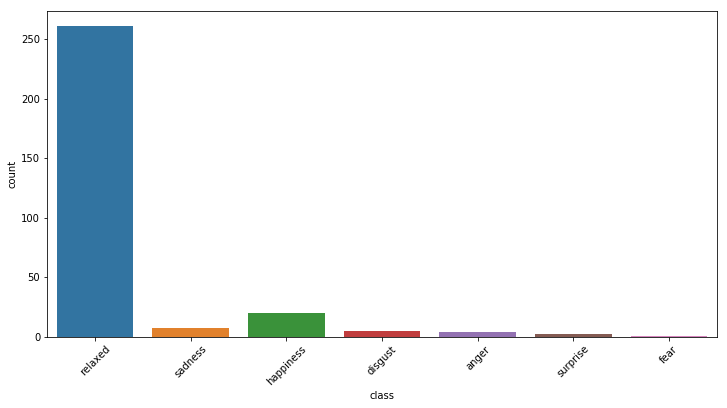

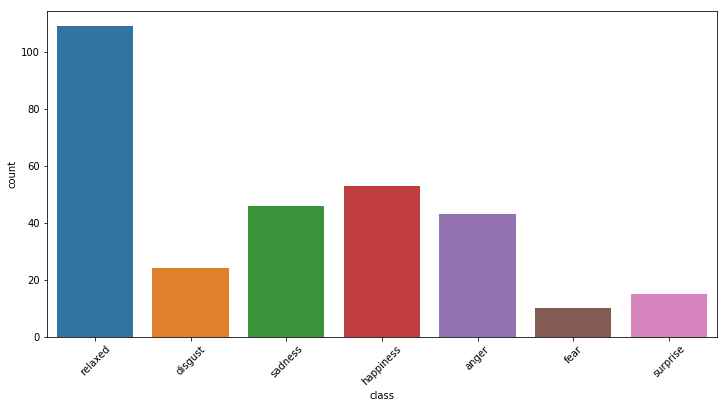

In [18]:
y_test_df = pd.DataFrame(data=y_pred_test)
y_test_df.columns = ['id']
y_test_df["class"] = y_test_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_test_df)
plt.xticks(rotation=45)

plt.show()

y_pred_df = pd.DataFrame(data=y_test)
y_pred_df.columns = ['id']
y_pred_df["class"] = y_pred_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_pred_df)
plt.xticks(rotation=45)

plt.show()

# Feature 1: N-Grams

In [19]:
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = arabic_sw,   \
                             ngram_range=(2, 2), \
                             max_features = 500) 
data_features = vectorizer.fit_transform(dataset['tweet_clean'])
data_features = data_features.toarray()
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(data_features, y, test_size=0.4, random_state=0)

forest = RandomForestClassifier(n_estimators = 500).fit( X_train, y_train )

In [20]:
y_pred_train = forest.predict(X_train)
matrix_train = confusion_matrix(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
fscore_train = f1_score(y_train, y_pred_train, average = 'weighted')
report_train = classification_report(y_train, y_pred_train)

y_pred_test = forest.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
fscore_test = f1_score(y_test, y_pred_test, average = 'weighted')
report_test = classification_report(y_test, y_pred_test)

In [23]:
print ('Train accuracy_score:', accuracy_train)
print ('\nTrain f_score:', fscore_train)
print ('\nTrain confusion_matrix:\n', matrix_train)
print ('\n', report_train)

print ('\n\nTest accuracy_score:', accuracy_test)
print ('\nTest f_score:', fscore_test)
print ('\nTest confusion_matrix:', matrix_test)
print ('\n', report_test)

Train accuracy_score: 0.6828046744574291

Train f_score: 0.6682829986751192

Train confusion_matrix:
 [[ 43   1   0   0   0  38   2]
 [  0  34   0   0   0  26   0]
 [  1   0  25   0   0  40   0]
 [  0   0   0   4   0   9   1]
 [  0   0   1   0  20  19   0]
 [  1   0   0   0   0 238   3]
 [  0   0   0   1   0  47  45]]

              precision    recall  f1-score   support

          1       0.96      0.51      0.67        84
          2       0.97      0.57      0.72        60
          3       0.96      0.38      0.54        66
          4       0.80      0.29      0.42        14
          5       1.00      0.50      0.67        40
          6       0.57      0.98      0.72       242
          7       0.88      0.48      0.62        93

avg / total       0.79      0.68      0.67       599



Test accuracy_score: 0.3575

Test f_score: 0.2344154344768314

Test confusion_matrix: [[  0   1   2   0   1  55   0]
 [  3   1   0   0   0  31   0]
 [  2   1   1   1   1  46   0]
 [  3   0   1   0

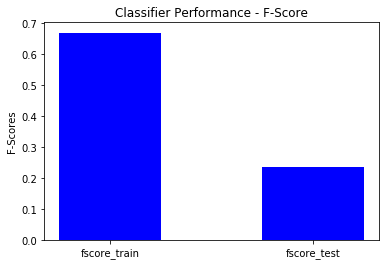

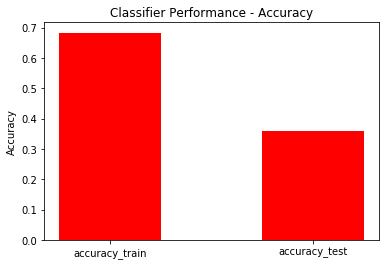

In [24]:
objects = ('fscore_train','fscore_test')
y_pos = np.arange(len(objects))
fscore_valuez = [fscore_train, fscore_test]

plt.bar(y_pos, fscore_valuez, width = 0.5, color = 'b', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('F-Scores')
plt.title('Classifier Performance - F-Score')

plt.show()

objects = ('accuracy_train','accuracy_test')
y_pos = np.arange(len(objects))
accuracy_valuez = [accuracy_train, accuracy_test]

plt.bar(y_pos, accuracy_valuez, width = 0.5, color = 'r', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Classifier Performance - Accuracy')

plt.show()

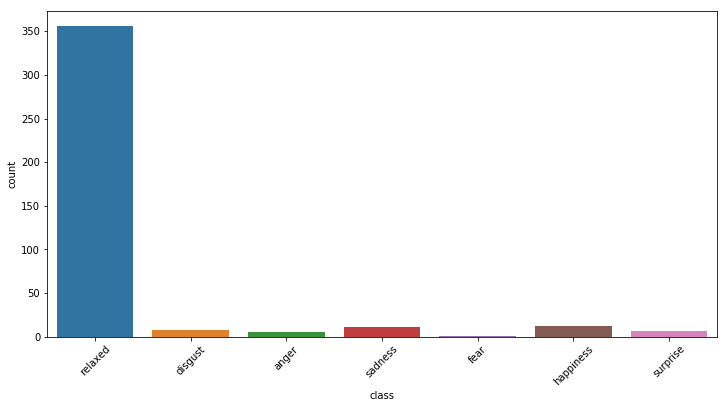

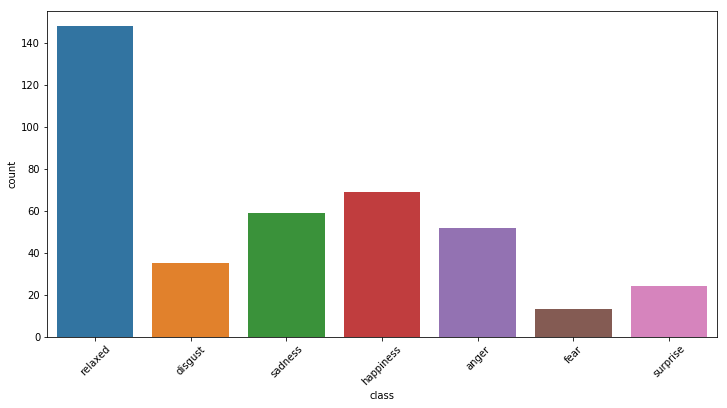

In [25]:
y_test_df = pd.DataFrame(data=y_pred_test)
y_test_df.columns = ['id']
y_test_df["class"] = y_test_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_test_df)
plt.xticks(rotation=45)

plt.show()

y_pred_df = pd.DataFrame(data=y_test)
y_pred_df.columns = ['id']
y_pred_df["class"] = y_pred_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_pred_df)
plt.xticks(rotation=45)

plt.show()

# Feature 2: TF-IDF

In [26]:
vectorizer = TfidfVectorizer(min_df=5,
                             max_df = 0.8,
                             sublinear_tf=True,
                             use_idf=True)
tfidf_data_features = vectorizer.fit_transform(dataset['tweet_clean'])
X_train, X_test, y_train, y_test = train_test_split(tfidf_data_features, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators = 500).fit( X_train, y_train )

In [27]:
y_pred_train = forest.predict(X_train)
matrix_train = confusion_matrix(y_train, y_pred_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
fscore_train = f1_score(y_train, y_pred_train, average = 'weighted')
report_train = classification_report(y_train, y_pred_train)

y_pred_test = forest.predict(X_test)
matrix_test = confusion_matrix(y_test, y_pred_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
fscore_test = f1_score(y_test, y_pred_test, average = 'weighted')
report_test = classification_report(y_test, y_pred_test)

In [28]:
print ('Train accuracy_score:', accuracy_train)
print ('\nTrain f_score:', fscore_train)
print ('\nTrain confusion_matrix:\n', matrix_train)
print ('\n', report_train)

print ('\n\nTest accuracy_score:', accuracy_test)
print ('\nTest f_score:', fscore_test)
print ('\nTest confusion_matrix:', matrix_test)
print ('\n', report_test)

Train accuracy_score: 0.9513590844062947

Train f_score: 0.951283616819583

Train confusion_matrix:
 [[ 94   0   0   0   0   3   0]
 [  0  67   0   0   0   4   0]
 [  0   1  69   0   0   5   0]
 [  0   0   0  14   0   3   0]
 [  2   0   0   0  45   2   0]
 [  0   0   1   0   0 279   1]
 [  0   0   0   0   0  12  97]]

              precision    recall  f1-score   support

          1       0.98      0.97      0.97        97
          2       0.99      0.94      0.96        71
          3       0.99      0.92      0.95        75
          4       1.00      0.82      0.90        17
          5       1.00      0.92      0.96        49
          6       0.91      0.99      0.95       281
          7       0.99      0.89      0.94       109

avg / total       0.95      0.95      0.95       699



Test accuracy_score: 0.36666666666666664

Test f_score: 0.31082751065359765

Test confusion_matrix: [[ 5  1  1  0  2 35  2]
 [ 3  1  0  0  2 16  2]
 [ 4  5  7  0  0 22  5]
 [ 1  0  0  1  0  8  0]
 

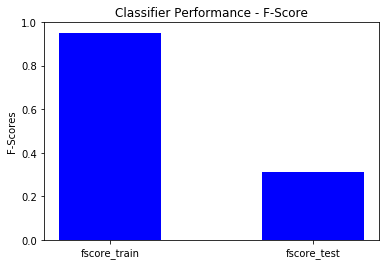

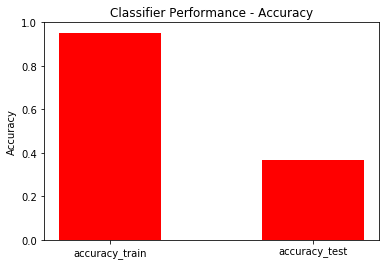

In [29]:
objects = ('fscore_train','fscore_test')
y_pos = np.arange(len(objects))
fscore_valuez = [fscore_train, fscore_test]

plt.bar(y_pos, fscore_valuez, width = 0.5, color = 'b', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('F-Scores')
plt.title('Classifier Performance - F-Score')

plt.show()

objects = ('accuracy_train','accuracy_test')
y_pos = np.arange(len(objects))
accuracy_valuez = [accuracy_train, accuracy_test]

plt.bar(y_pos, accuracy_valuez, width = 0.5, color = 'r', align='center', alpha = 1)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy')
plt.title('Classifier Performance - Accuracy')

plt.show()

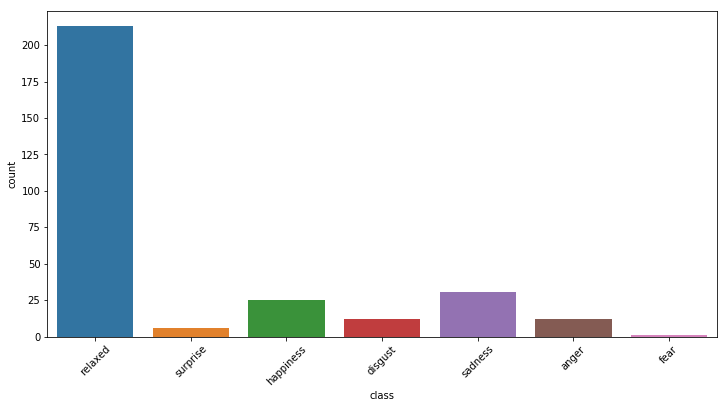

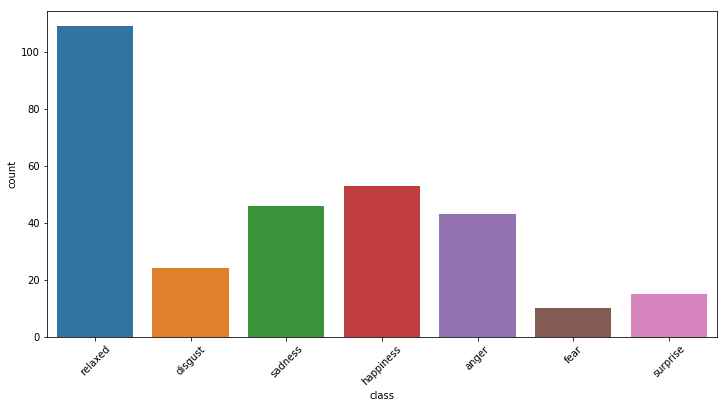

In [30]:
y_test_df = pd.DataFrame(data=y_pred_test)
y_test_df.columns = ['id']
y_test_df["class"] = y_test_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_test_df)
plt.xticks(rotation=45)

plt.show()

y_pred_df = pd.DataFrame(data=y_test)
y_pred_df.columns = ['id']
y_pred_df["class"] = y_pred_df["id"].apply(lambda x: label_reverse(x))

plt.figure(figsize = (12, 6))
sns.countplot(x = 'class', data = y_pred_df)
plt.xticks(rotation=45)

plt.show()